# 

# Pymaceuticals Inc.
---

### Analysis

- Weight of the mouse appears to impact the volume of the tumors. 
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
testdf = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
testdf.head(-5)

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1883,t718,45,63.423695,4,Placebo,Female,10,30
1884,o562,45,72.455421,2,Propriva,Female,4,25
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1886,v991,45,70.167749,4,Propriva,Female,10,30


In [28]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [29]:
# Checking the number of mice.
testdf["Mouse ID"].nunique()

249

In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
testdf.groupby(["Mouse ID","Timepoint"]).size().sort_values(ascending=False).head(15)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
dtype: int64

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmouse=testdf.loc[testdf["Mouse ID"]=="g989"]
dupmouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask=testdf["Mouse ID"] != "g989"
testdf_clean=testdf.loc[mask]
testdf_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [33]:
# Checking the number of mice in the clean DataFrame.
testdf_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

vol_mean=testdf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
vol_median=testdf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
vol_var=testdf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
vol_stddev=testdf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
vol_sem=testdf_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

vol_sum_table= pd.DataFrame({"Mean Tumor Volume":vol_mean,
                             "Median Tumor Volume":vol_median,
                             "Tumor Volume Variance":vol_var,
                             "Tumor Volume Std. Dev.":vol_stddev,
                             "Tumor Volume Std. Err": vol_sem }).reset_index()

vol_sum_table


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#
vol_sum_table2=testdf_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]}).reset_index
vol_sum_table2


<bound method DataFrame.reset_index of              Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count=testdf_clean["Drug Regimen"].value_counts()
drug_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

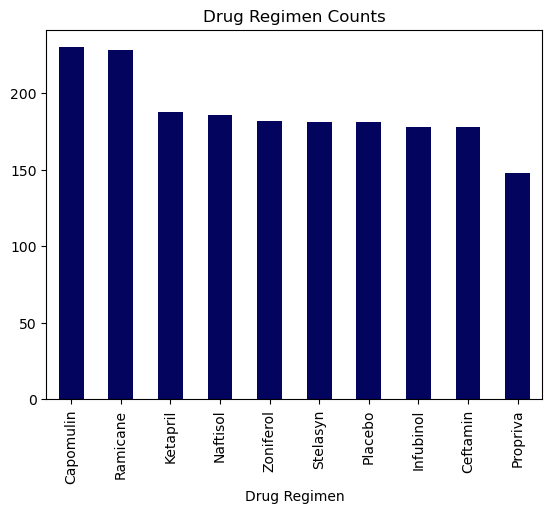

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count.plot(kind="bar", title="Drug Regimen Counts", color="#03045e")
# plt.xlabel("Drug Regimen", fontsize=10, fontstyle="italic")
# plt.ylabel("# of Observed Mouse Time Points", fontsize=10, fontstyle="italic")
plt.show()

In [38]:
# # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# #1 get the data
# #x:cities, y: cars_in_cities

# #2 create the canvas
# plt.figure(figsize=(8,6))

# #3 skelelton plot
# plt.bar(cities, cars_in_cities, color="#1e96fc")

# #4 labels
# plt.ylabel("# of Cars", fontsize=12, fontstyle="italic")
# plt.title("Counts of Cars in City", fontsize=16, fontweight="bold")
# plt.ylim(0,600)

# plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)

# #5 show/save fig
# plt.show()

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [40]:
by_sex=testdf_clean["Sex"].value_counts()
by_sex

Sex
Male      958
Female    922
Name: count, dtype: int64

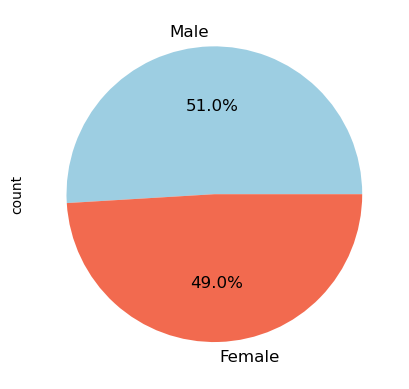

In [125]:
by_sex.plot(kind='pie', colors = ["#9dcee2", "#f26a4f"], fontsize=12, autopct = '%1.1f%%')
plt.show()

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red", "orange", "lightcoral", "lightskyblue"]

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_last=testdf_clean.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
tumor_last

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [44]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df=tumor_last.merge(testdf_clean, on=["Mouse ID", "Timepoint"], how="left")
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
tx_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for rx in tx_list:
    #referred to Chris Madden's instructions for help
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = new_df.loc[new_df["Drug Regimen"] == rx, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({rx} Outliers: {outliers})')


(Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


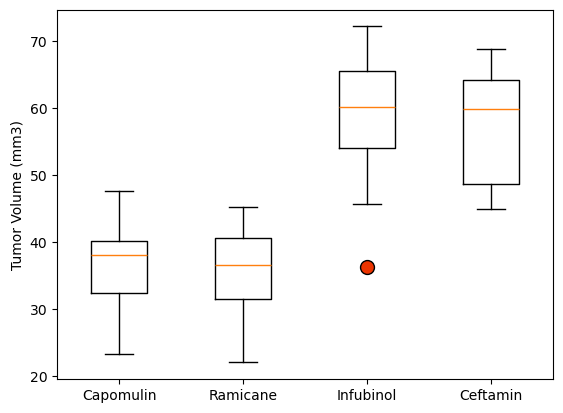

In [116]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = tx_list, flierprops=dict(markerfacecolor='#ec3400', markersize=10))

#customize
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data= testdf_clean.loc[testdf["Drug Regimen"]=="Capomulin"]
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


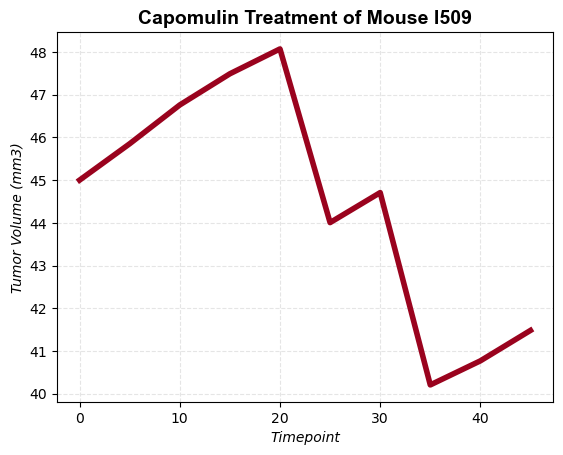

In [129]:
#Charting mouse l509
mousetx_data=capomulin_data.loc[capomulin_data["Mouse ID"]=='l509']
x_value= mousetx_data["Timepoint"]
y_value= mousetx_data["Tumor Volume (mm3)"]

# plt.figure(figsize=(9, 6))

#get the data
plt.plot(x_value,y_value, color='#9a031e', linewidth=4)

#customize
plt.xlabel("Timepoint",fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)",fontsize=10, fontstyle="italic")
plt.title("Capomulin Treatment of Mouse l509",fontsize=14,fontweight="bold", fontfamily="arial")

plt.grid(color="grey", linestyle="--", alpha=0.2)

plt.show()

In [49]:
#Choosing another mouse to chart
capomulin_data.sort_values(by='Tumor Volume (mm3)',ascending=True).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1849,s185,45,23.343598,1,Capomulin,Female,3,17
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1741,x401,40,28.167397,0,Capomulin,Female,16,15
1479,s185,35,28.328531,1,Capomulin,Female,3,17
1843,m601,45,28.430964,1,Capomulin,Male,22,17


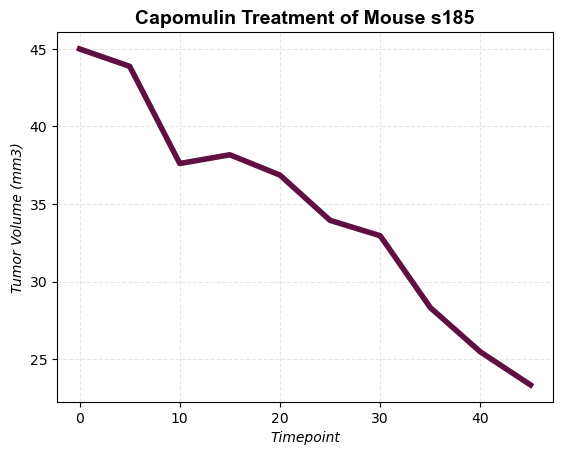

In [131]:
#Charting mouse s185
mousetx_data=capomulin_data.loc[capomulin_data["Mouse ID"]=='s185']
x_value= mousetx_data["Timepoint"]
y_value= mousetx_data["Tumor Volume (mm3)"]

#get the data
plt.plot(x_value,y_value, color='#5f0f40', linewidth=4)

#customize
plt.xlabel("Timepoint",fontsize=10, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)",fontsize=10, fontstyle="italic")
plt.title("Capomulin Treatment of Mouse s185",fontsize=14,fontweight="bold", fontfamily="arial")

plt.grid(color="grey", linestyle="--", alpha=0.2)

plt.show()



In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_mean=capomulin_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
capo_mean.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


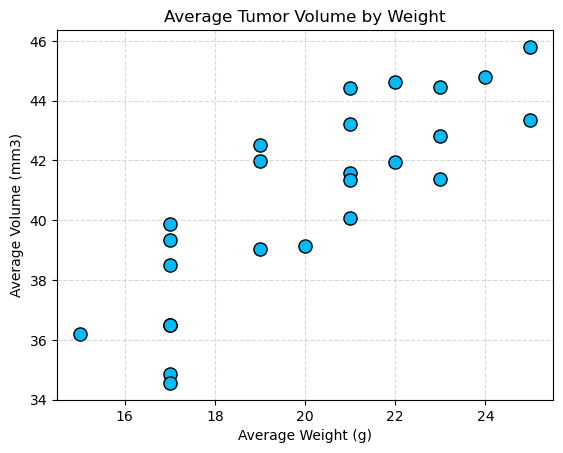

In [115]:
#the data
xvalue= capo_mean['Weight (g)']
yvalue=capo_mean['Tumor Volume (mm3)']

#get the data
plt.scatter(xvalue, yvalue, facecolor="#00bbf9", edgecolor="black", s=90)


plt.title("Average Tumor Volume by Weight")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')

plt.grid(color="grey", linestyle="--", alpha=0.3)

plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The r-squared is: 0.7088568047708723


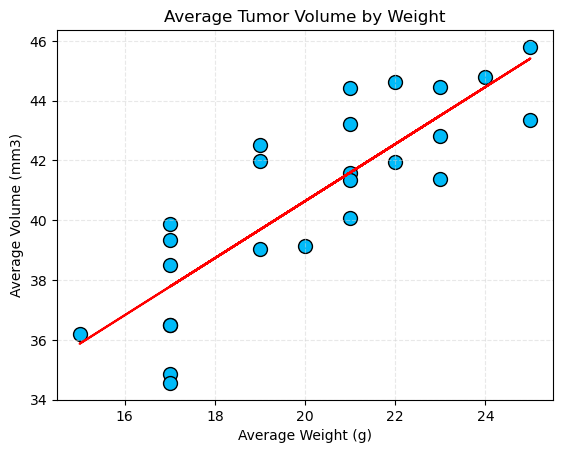

In [143]:
# USING LINREGRESS
from scipy.stats import linregress
capo_mean=capomulin_data.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
x_values= capo_mean['Weight (g)']
y_values=capo_mean['Tumor Volume (mm3)']

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Step 2: Make the canvas
# plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#00bbf9", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

# customize
plt.title("Average Tumor Volume by Weight")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.annotate(line_eq,(20, 60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()